#Hand Sign Language Detection using CNN

### Dataset and Packages Loading

In [ ]:
# Setting google drive as a directory for dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing packages
import os
from IPython.display import Image

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
dir_path = "gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets"
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets/amer_sign2.png
gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets/american_sign_language.PNG
gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets/amer_sign3.png
gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets/sign_mnist_test.csv
gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets/sign_mnist_train.csv


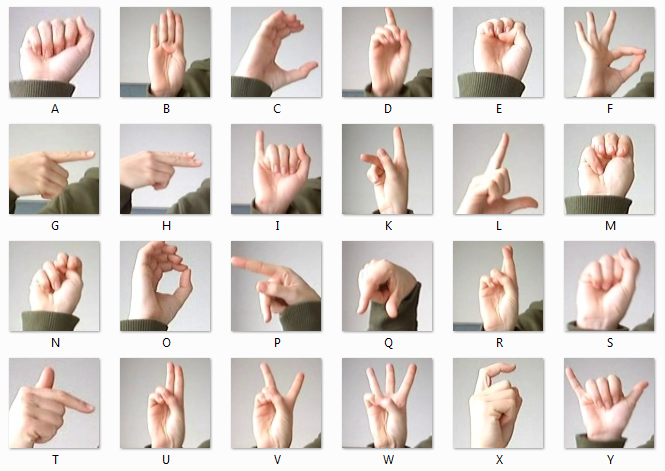

In [ ]:
Image('gdrive/My Drive/Datasets/SignLanguageMNIST_Datasets/amer_sign2.png')

In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/Datasets/SignLanguageMNIST_Datasets/sign_mnist_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Datasets/SignLanguageMNIST_Datasets/sign_mnist_test.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [ ]:
# Creating training and testing arrays
train_set = np.array(train_df, dtype = 'float32')
test_set = np.array(test_df, dtype='float32')

### Data Exploration

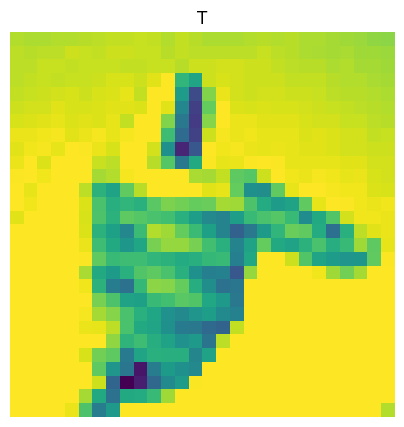

In [ ]:
# Showing a random image for class label verification
plt.figure(figsize=(5,5))
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28)))
plt.imshow(train_set[i,1:].reshape((28,28)))
label_index = train_df["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')
plt.show()

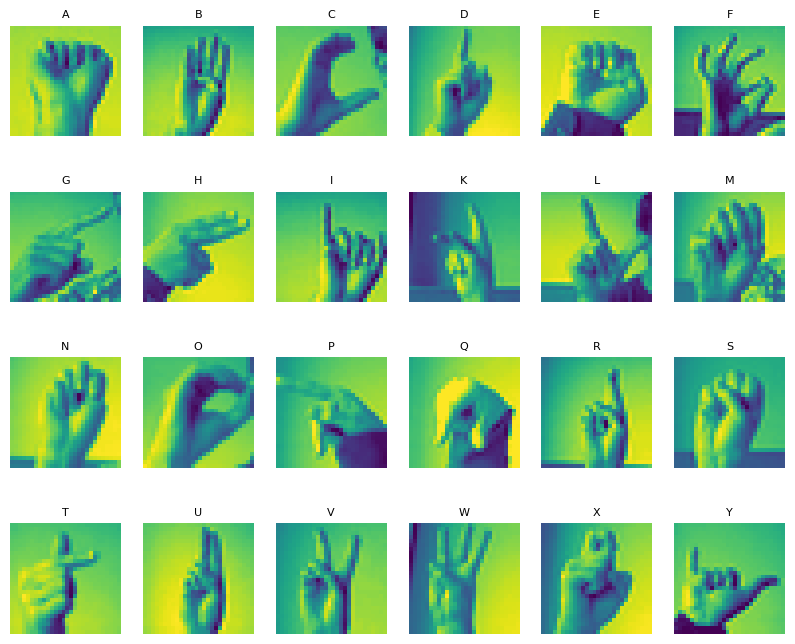

In [ ]:
#Plotting images for each alphabet
fig, axes = plt.subplots(4, 6, figsize=(10,8))
axes = axes.ravel()
n_train = len(train_set)
i = 0
for alpha in class_names:
  if alpha != 'J' or alpha != 'K':
    for index in range(n_train):
      if alpha == class_names[int(train_set[index,0])]:
        label_index = int(train_set[index,0])
        axes[i].imshow(train_set[index,1:].reshape((28,28)))
        axes[i].set_title(class_names[label_index], fontsize = 8)
        axes[i].axis('off')
        i+=1
        break
plt.subplots_adjust(hspace=0.4)
plt.show()

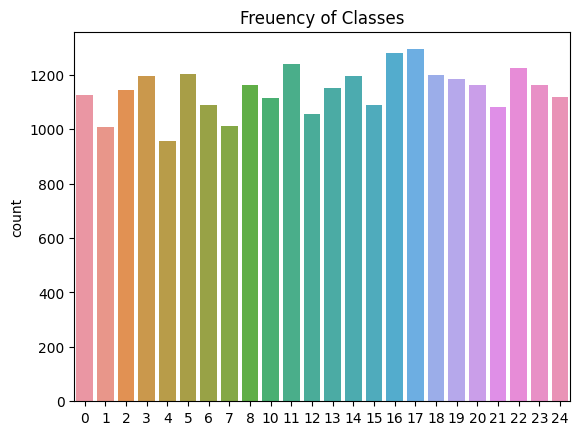

In [ ]:
sns.countplot(x=train_df['label'].values)
plt.title('Freuency of Classes')
plt.show()

### Data Preprocessing

In [ ]:
# Normalizing the images
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

In [ ]:
# Spliting the training and test sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [ ]:
# Unpacking the training and test array
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(7172, 28, 28, 1)
(21964,)
(5491,)
(7172,)


### Model Building

In [ ]:
# Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [ ]:
# Compiling and training the CNN model
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
history = cnn_model.fit(X_train, y_train, batch_size = 200, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
110/110 [==============================] - 3s 11ms/step - loss: 2.8714 - accuracy: 0.1281 - val_loss: 1.9900 - val_accuracy: 0.3837
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 1.5193 - accuracy: 0.4939 - val_loss: 0.9036 - val_accuracy: 0.6884
Epoch 3/50
110/110 [==============================] - 1s 8ms/step - loss: 0.9513 - accuracy: 0.6719 - val_loss: 0.5024 - val_accuracy: 0.8612
Epoch 4/50
110/110 [==============================] - 1s 8ms/step - loss: 0.6717 - accuracy: 0.7695 - val_loss: 0.3318 - val_accuracy: 0.9104
Epoch 5/50
110/110 [==============================] - 1s 8ms/step - loss: 0.5077 - accuracy: 0.8248 - val_loss: 0.2235 - val_accuracy: 0.9479
Epoch 6/50
110/110 [==============================] - 1s 9ms/step - loss: 0.3938 - accuracy: 0.8659 - val_loss: 0.1379 - val_accuracy: 0.9747
Epoch 7/50
110/110 [==============================] - 1s 12ms/step - loss: 0.3063 - accuracy: 0.8967 - val_loss: 0.0901 - val_accuracy: 0.9836
Epoc

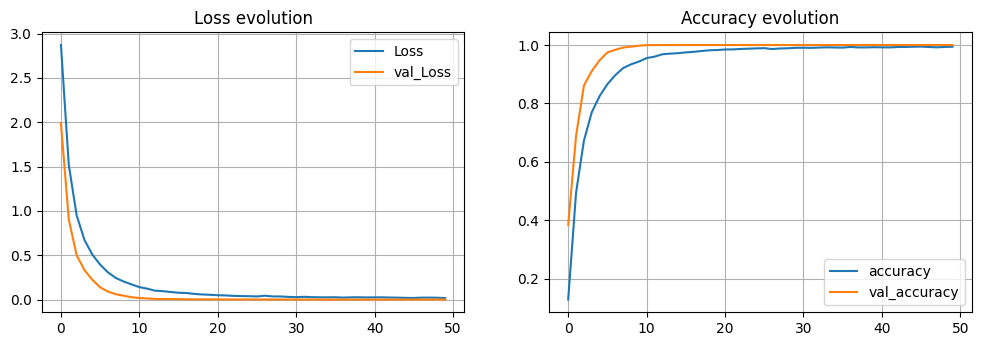

In [ ]:
# Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.show()

In [ ]:
# Predicting test dataset
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

225/225 [==============================] - 0s 2ms/step


### Model Evaluation

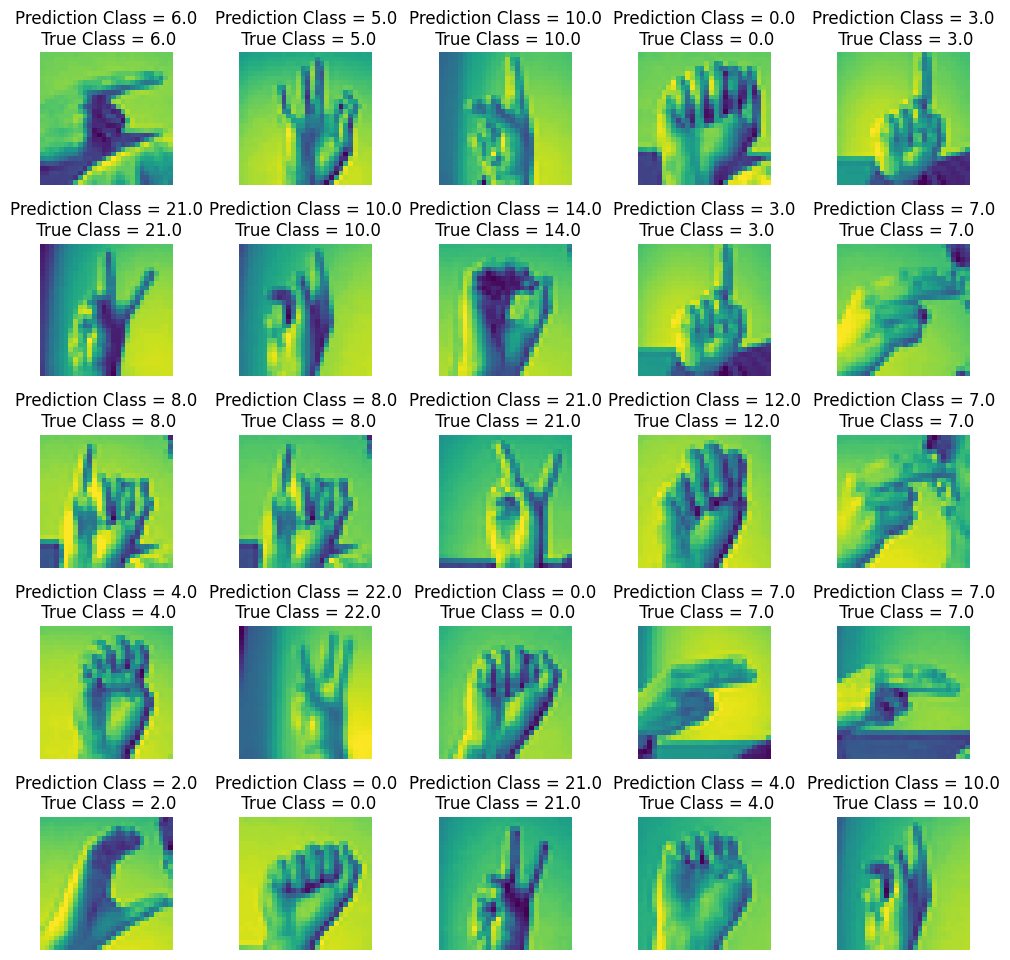

In [ ]:
# Visualizing the random predictions
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
cm = metrics.confusion_matrix(y_test, predicted_classes)

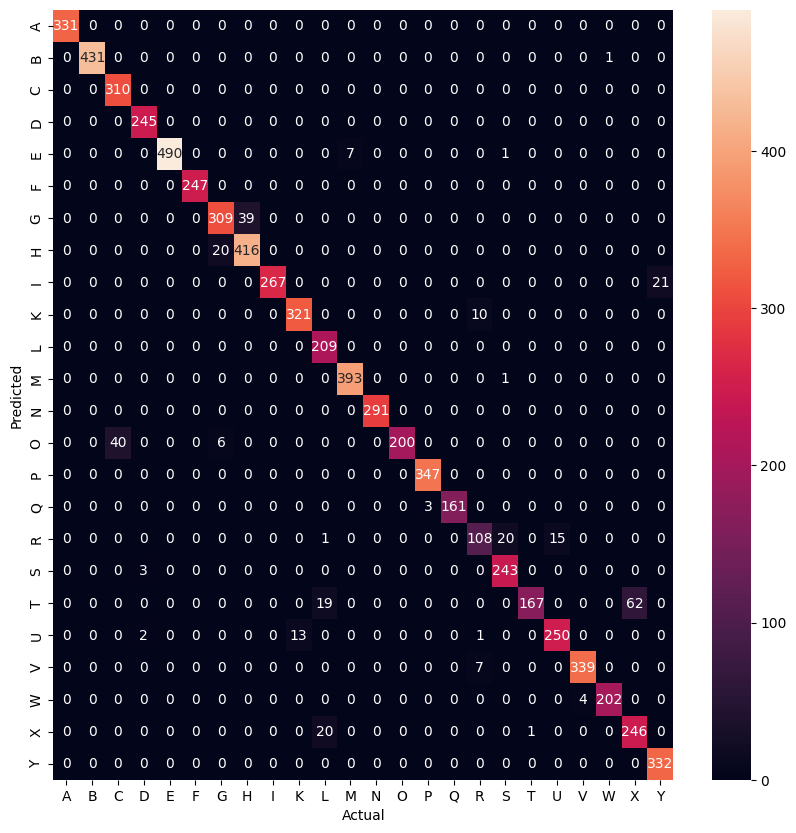

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, predicted_classes)
labels_cm = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
df_cm = pd.DataFrame(cm, index=labels_cm, columns=labels_cm)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification accuracy
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9558003346346905
